In [2]:
import numpy as np
from matplotlib import pyplot as plt
import math

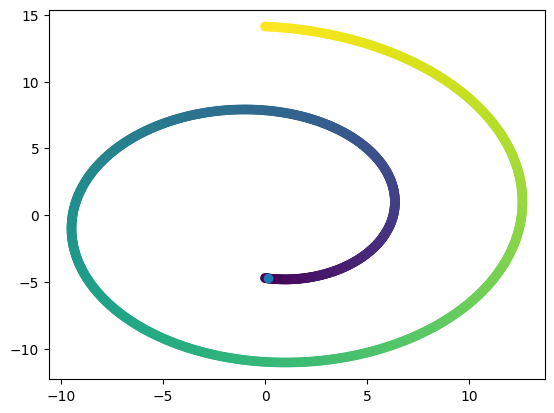

In [42]:
N = 1000

phi = np.linspace(1.5*math.pi, 4.5*math.pi, N)

x = phi*np.cos(phi)
y = phi*np.sin(phi)

X = np.array([x,y]).reshape(2,N).T

plt.scatter(x,y, c = phi)

plt.scatter(X[3,0], X[3,1])


In [55]:
def my_PCA(X, k):
    """
    X: dataframe
        dataframe with n observation and p features, assumed to be already centered (nxp)
    k: int
        number of principal components we want to project on
    output: array-shape
        return the "projection matrix": this is a (p x k) matrix that is used to projecs a dataset of n observations and p features
        to a dataset with n observations and k feature; in particular, the "k most imporant" features of the initial dataset.
        (important according to "preserving varianca" paradigma)
        Remark:
        to actually projects, we have to compute the dot product between the initial nxp dataset and the output (pxk) matrix of this function my_PCA.
        Example:
        X = my_initial_nxp_dataset #assume X is centered
        find_best_k(X) #used to find the best k, call it k_bar
        proj_mtrx = my_PCA(X, k_bar)
        proj_dataset = X.dot(proj_mtrx) # this is the entire initial dataset projected onto the k PCs, so it is a nxk matrix.
    """
  
    cov_mat = np.dot(X.T, X)

    eig_vals, eig_vecs = np.linalg.eig(cov_mat)

    sorted_indices = np.argsort(eig_vals)[::-1]
    sorted_eigvecs = eig_vecs[:,sorted_indices]
    
    top_k_eigvecs = sorted_eigvecs[:k]
    print(top_k_eigvecs.shape)

    return top_k_eigvecs

(2, 2)
(2, 1000)
(1000, 2)


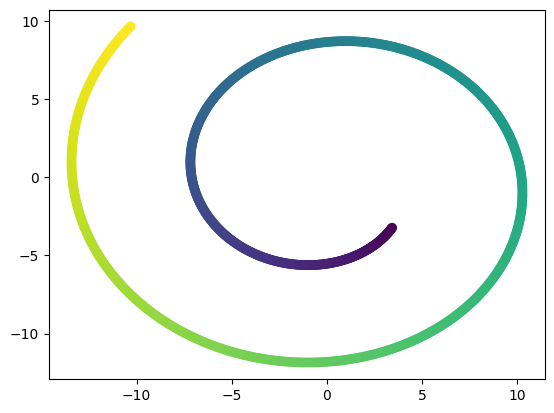

In [70]:
proj = (my_PCA(X,2)).dot(X.T)
print(proj.shape)
print(X.shape)

first_comp = [proj[0][i] for i in range(X.shape[0])]
second_comp = [proj[1][i] for i in range(X.shape[0])]
#second_comp = [0 for i in range(X.shape[0])]


plt.scatter(first_comp, second_comp, c = phi)
